In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
import sklearn
theme = 'seismic'
from sklearn.datasets import make_blobs
from sklearn.model_selection import RandomizedSearchCV

In [192]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaN,NaN
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaN,NaN
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service


In [193]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [194]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Location', 'Subscription_Start_Date',
       'Subscription_Type', 'Monthly_Payment', 'Payment_Method',
       'Monthly_Hours_Watched', 'Favorite_Genre', 'Devices_Used',
       'Average_Session_Length', 'Content_ID', 'Rating_Given', 'Churned',
       'Date_of_Churn', 'Reason_for_Churn'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

Churned(Original Features):
Content_ID                0.024253
User_ID                   0.009620
Average_Session_Length    0.008055
Monthly_Payment          -0.013059
Age                      -0.045139
Monthly_Hours_Watched    -0.060233
Rating_Given             -0.175378
Name: Churned, dtype: float64


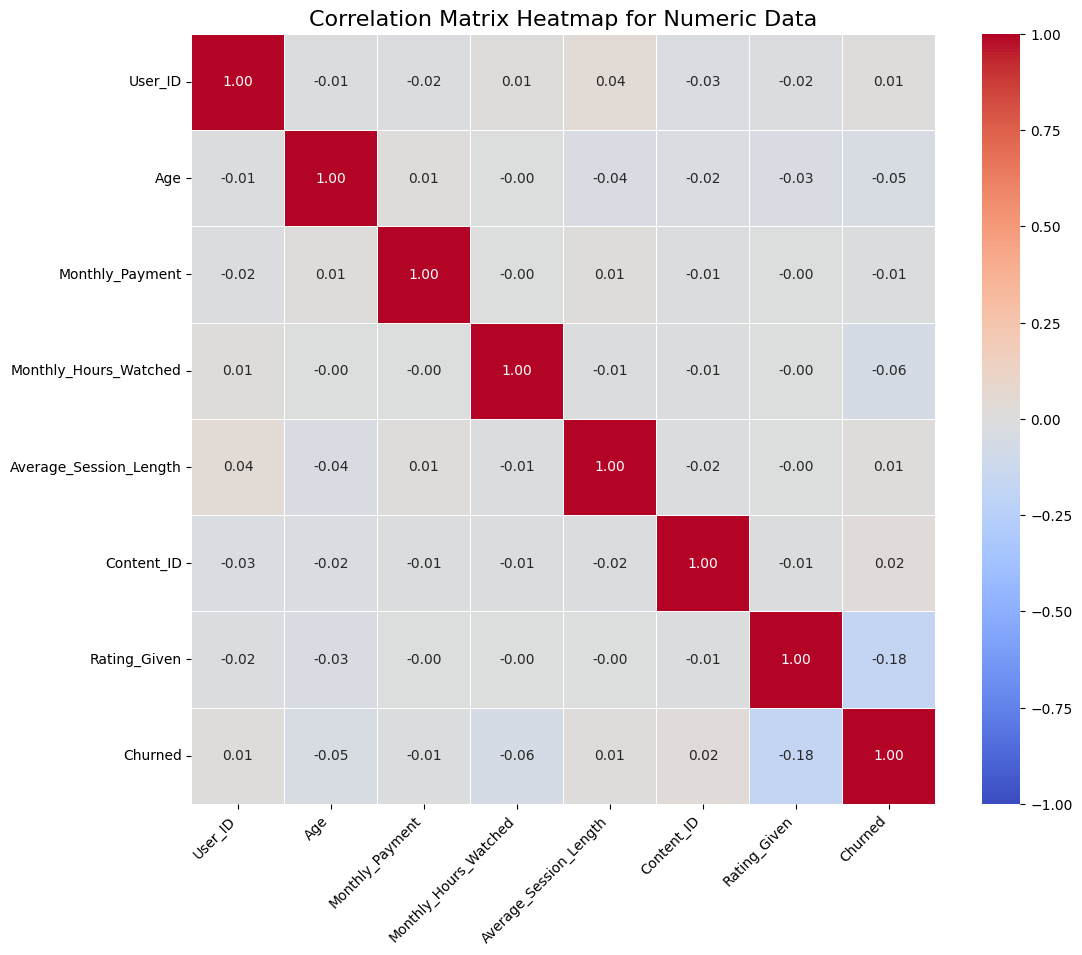

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_78724/3643251438.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='viridis')


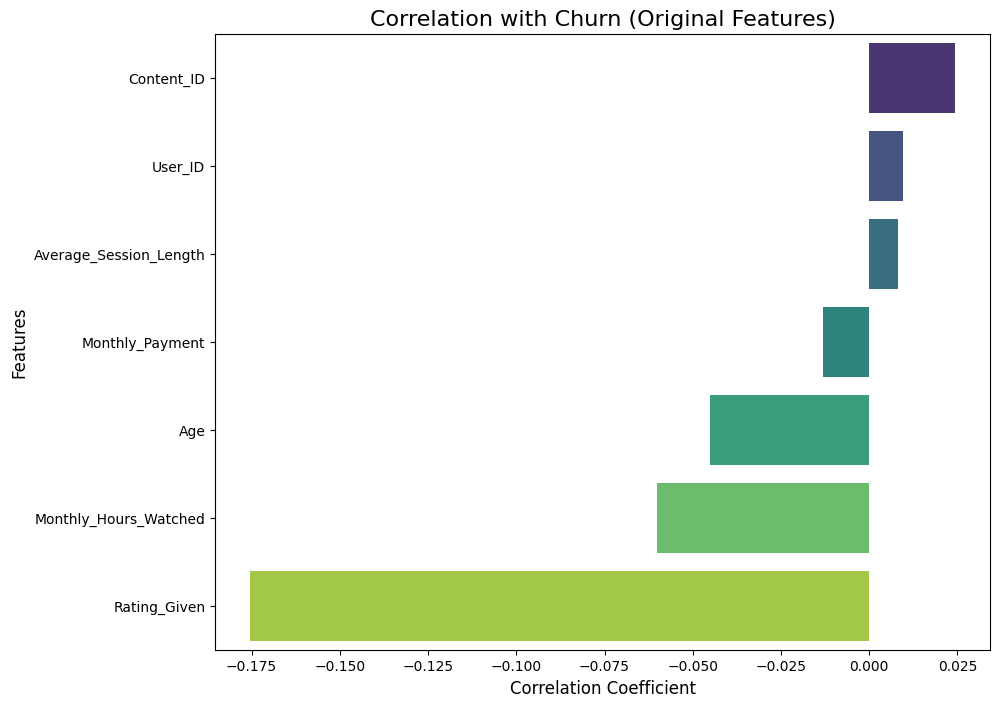

In [196]:
# Correlation Analysis
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_features].corr()

# Correlation with the target variable
churn_corr = corr_matrix['Churned'].drop('Churned').sort_values(ascending=False)
print("Churned(Original Features):")
print(churn_corr)

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap for Numeric Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Bar plot for correlation with is_canceled
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='viridis')
plt.title('Correlation with Churn (Original Features)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

Feature Engineering

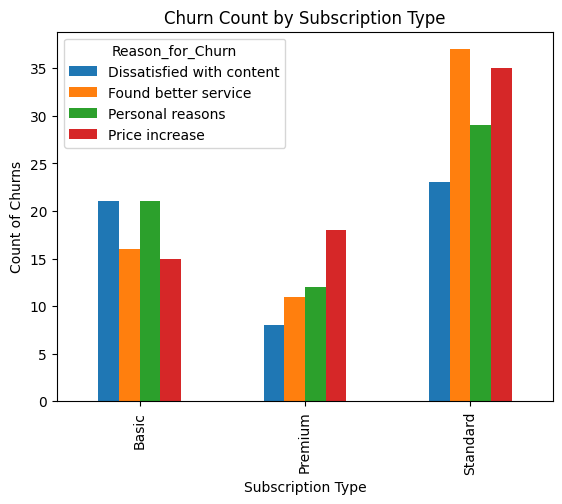

In [197]:
# Churners based on Subscription Type and Churn Reasons (visual)
churned_df = (df[df['Churned'] == 1])
churn_counts = churned_df.groupby(['Subscription_Type', 'Reason_for_Churn']).size().unstack(fill_value=0)

churn_counts.plot(kind='bar')
plt.title('Churn Count by Subscription Type')   
plt.xlabel('Subscription Type')
plt.ylabel('Count of Churns')
plt.show()

In [198]:
# Prepare columns for KNN imputation
knn_columns = ['Date_of_Churn', 'Reason_for_Churn']
knn_data = df[knn_columns]
knn_data_encoded = pd.get_dummies(knn_data, columns=['Date_of_Churn', 'Reason_for_Churn'], dummy_na=True)

# Perform KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = knn_imputer.fit_transform(knn_data_encoded)
knn_imputed_df = pd.DataFrame(knn_imputed, columns=knn_data_encoded.columns)

In [199]:
# Convert subscription start date 
df['Subscription_Start_Date']= pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn']= pd.to_datetime(df['Date_of_Churn'])

In [200]:
# set reference date
last_date = df['Subscription_Start_Date'].max()

In [201]:
# Subscription Length New Column Added
df['Subscription_Length'] = pd.to_datetime(df['Date_of_Churn']) - pd.to_datetime(df['Subscription_Start_Date'])
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,NaT
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,NaT
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,NaT
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,NaT
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,139 days
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaT,NaN,NaT
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaT,NaN,NaT
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,143 days


In [202]:
# Define a custom function to impute missing values in 'Subscription_Length'
def impute_missing_values(row):
    if pd.isna(row['Subscription_Length']):
        if pd.notna(row['Subscription_Start_Date']):
            subscription_start_date = pd.to_datetime(row['Subscription_Start_Date'])
            row['Subscription_Length'] = (last_date - subscription_start_date).days
    return row

# Apply the custom function to each row
df_imputed = df.apply(impute_missing_values, axis=1)

print(df_imputed)

     User_ID  Age  Gender Location    Subscription_Start_Date  \
0          1   56   Other  Central 2020-06-07 01:53:37.656934   
1          2   69   Other     West 2024-02-21 01:53:37.656980   
2          3   46  Female    North 2022-10-06 01:53:37.656995   
3          4   32  Female     East 2022-01-04 01:53:37.657006   
4          5   60  Female    North 2020-03-13 01:53:37.657017   
..       ...  ...     ...      ...                        ...   
995      996   25   Other     East 2020-10-26 01:53:37.667884   
996      997   66  Female     West 2020-05-06 01:53:37.667895   
997      998   52   Other    South 2019-06-19 01:53:37.667906   
998      999   69    Male     East 2020-11-13 01:53:37.667917   
999     1000   32    Male    North 2022-07-10 01:53:37.667930   

    Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
0             Premium            19.99    Credit Card              31.513153   
1            Standard            14.99    Credit Card      

In [203]:
df['Subscription_Days']=df['Subscription_Length'].dt.days

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   User_ID                  1000 non-null   int64          
 1   Age                      1000 non-null   int64          
 2   Gender                   1000 non-null   object         
 3   Location                 1000 non-null   object         
 4   Subscription_Start_Date  1000 non-null   datetime64[ns] 
 5   Subscription_Type        1000 non-null   object         
 6   Monthly_Payment          1000 non-null   float64        
 7   Payment_Method           1000 non-null   object         
 8   Monthly_Hours_Watched    1000 non-null   float64        
 9   Favorite_Genre           1000 non-null   object         
 10  Devices_Used             1000 non-null   object         
 11  Average_Session_Length   1000 non-null   float64        
 12  Content_ID           

In [205]:
# location for Location Categorical COLUMN 
def Location_Categorical(x):
    if x == 'West':
        return 1
    elif x == 'North':
        return 2
    elif x == 'Central':
        return 3
    elif x == 'East':
        return 4
    elif x == 'South':
        return 5
    else:
        return 0

In [206]:
df['Location_Categorical'] = df['Location'].apply(Location_Categorical)
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length,Subscription_Days,Location_Categorical
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,NaT,NaN,3
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,NaT,NaN,1
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,NaT,NaN,2
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,NaT,NaN,4
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,NaT,NaN,2


In [207]:
df['Devices_Used'].value_counts()

Devices_Used
Mobile    408
Tablet    217
TV        201
PC        174
Name: count, dtype: int64

In [208]:
def Device_Categorical(x):
    if x == 'Mobile':
        return 1
    elif x == 'Tablet':
        return 2
    elif x == 'TV':
        return 3
    elif x == 'PC':
        return 4
    else:
        return 0

In [209]:
df['Device_Categorical'] = df['Devices_Used'].apply(Device_Categorical)
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length,Subscription_Days,Location_Categorical,Device_Categorical
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,1.195762,1023,5,0,NaT,NaN,NaT,NaN,3,4
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,0.809002,1076,1,0,NaT,NaN,NaT,NaN,1,4
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,1.153570,1095,2,0,NaT,NaN,NaT,NaN,2,2
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,0.609503,1003,1,0,NaT,NaN,NaT,NaN,4,3
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,0.359971,1012,4,0,NaT,NaN,NaT,NaN,2,1


In [210]:
def Gender_Categorical(x):
    if x == 'Male':
        return 1
    elif x == 'Female':
        return 2
    elif x == 'Other':
        return 3
    else:
        return 0

In [211]:
df['Gender_Categorical'] = df['Gender'].apply(Gender_Categorical)
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length,Subscription_Days,Location_Categorical,Device_Categorical,Gender_Categorical
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,1023,5,0,NaT,NaN,NaT,NaN,3,4,3
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,1076,1,0,NaT,NaN,NaT,NaN,1,4,3
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,1095,2,0,NaT,NaN,NaT,NaN,2,2,2
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,1003,1,0,NaT,NaN,NaT,NaN,4,3,2
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,1012,4,0,NaT,NaN,NaT,NaN,2,1,2


In [212]:
df['Subscription_Type'].value_counts()

Subscription_Type
Standard    530
Basic       276
Premium     194
Name: count, dtype: int64

In [213]:
def Subscription_Categorical(x):
    if x == 'Standard':
        return 1
    elif x == 'Basic':
        return 2
    elif x == 'Premium':
        return 3
    else:
        return 0

In [214]:
df['Subscription_Categorical'] = df['Subscription_Type'].apply(Subscription_Categorical)
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length,Subscription_Days,Location_Categorical,Device_Categorical,Gender_Categorical,Subscription_Categorical
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,5,0,NaT,NaN,NaT,NaN,3,4,3,3
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,1,0,NaT,NaN,NaT,NaN,1,4,3,1
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,2,0,NaT,NaN,NaT,NaN,2,2,2,1
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,1,0,NaT,NaN,NaT,NaN,4,3,2,1
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,4,0,NaT,NaN,NaT,NaN,2,1,2,1


In [215]:
df['Favorite_Genre'].value_counts()

Favorite_Genre
Drama          212
Action         205
Comedy         203
Sci-Fi         192
Documentary    188
Name: count, dtype: int64

In [216]:
def Genre_Categorical(x):
    if x == 'Drama':
        return 1
    elif x == 'Action':
        return 2
    elif x == 'Comedy':
        return 3
    elif x == 'Sci-Fi':
        return 4
    elif x == 'Documentary':
        return 5
    else:
        return 0

In [217]:
df['Genre_Categorical'] = df['Favorite_Genre'].apply(Genre_Categorical)
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length,Subscription_Days,Location_Categorical,Device_Categorical,Gender_Categorical,Subscription_Categorical,Genre_Categorical
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,0,NaT,NaN,NaT,NaN,3,4,3,3,2
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,0,NaT,NaN,NaT,NaN,1,4,3,1,1
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,0,NaT,NaN,NaT,NaN,2,2,2,1,4
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,0,NaT,NaN,NaT,NaN,4,3,2,1,2
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,0,NaT,NaN,NaT,NaN,2,1,2,1,4


In [218]:
df['Payment_Method'].value_counts()

Payment_Method
Credit Card     613
Direct Debit    194
PayPal          193
Name: count, dtype: int64

In [219]:
def Payment_Categorical(x):
    if x == 'Credit Card':
        return 1
    elif x == 'Direct Debit':
        return 2
    elif x == 'PayPal':
        return 3
    else:
        return 0

In [220]:
df['Payment_Categorical'] = df['Payment_Method'].apply(Payment_Categorical)
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Date_of_Churn,Reason_for_Churn,Subscription_Length,Subscription_Days,Location_Categorical,Device_Categorical,Gender_Categorical,Subscription_Categorical,Genre_Categorical,Payment_Categorical
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,NaT,NaN,NaT,NaN,3,4,3,3,2,1
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,NaT,NaN,NaT,NaN,1,4,3,1,1,1
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,NaT,NaN,NaT,NaN,2,2,2,1,4,3
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,NaT,NaN,NaT,NaN,4,3,2,1,2,1
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,NaT,NaN,NaT,NaN,2,1,2,1,4,1


In [221]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Location', 'Subscription_Start_Date',
       'Subscription_Type', 'Monthly_Payment', 'Payment_Method',
       'Monthly_Hours_Watched', 'Favorite_Genre', 'Devices_Used',
       'Average_Session_Length', 'Content_ID', 'Rating_Given', 'Churned',
       'Date_of_Churn', 'Reason_for_Churn', 'Subscription_Length',
       'Subscription_Days', 'Location_Categorical', 'Device_Categorical',
       'Gender_Categorical', 'Subscription_Categorical', 'Genre_Categorical',
       'Payment_Categorical'],
      dtype='object')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   User_ID                   1000 non-null   int64          
 1   Age                       1000 non-null   int64          
 2   Gender                    1000 non-null   object         
 3   Location                  1000 non-null   object         
 4   Subscription_Start_Date   1000 non-null   datetime64[ns] 
 5   Subscription_Type         1000 non-null   object         
 6   Monthly_Payment           1000 non-null   float64        
 7   Payment_Method            1000 non-null   object         
 8   Monthly_Hours_Watched     1000 non-null   float64        
 9   Favorite_Genre            1000 non-null   object         
 10  Devices_Used              1000 non-null   object         
 11  Average_Session_Length    1000 non-null   float64        
 12  Content

Model Building

In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
X = df[['Age', 'Monthly_Hours_Watched', 'Average_Session_Length','Rating_Given',
        'Location_Categorical', 'Device_Categorical', 'Gender_Categorical',
       'Subscription_Categorical', 'Genre_Categorical', 'Payment_Categorical']]
y = df['Churned']

In [232]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [233]:
# build our pipeline that includes these transformations
numeric_columns = ['Age', 'Monthly_Hours_Watched', 'Average_Session_Length','Rating_Given']
categorical_columns = ['Location_Categorical', 'Device_Categorical', 'Gender_Categorical',
       'Subscription_Categorical', 'Genre_Categorical', 'Payment_Categorical']

In [234]:
# test 3 models with cross validation to see which ones work best for this data
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

In [235]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ]
)

In [236]:
# Check if all specified columns are present in the DataFrame
missing_columns = set(numeric_columns + categorical_columns) - set(X_train.columns)

if missing_columns:
    print(f"Missing columns in the DataFrame: {missing_columns}")
else:
    print("All columns are present.")

 # Check data types of the columns in the DataFrame
print(X_train.dtypes)


All columns are present.
Age                           int64
Monthly_Hours_Watched       float64
Average_Session_Length      float64
Rating_Given                  int64
Location_Categorical          int64
Device_Categorical            int64
Gender_Categorical            int64
Subscription_Categorical      int64
Genre_Categorical             int64
Payment_Categorical           int64
dtype: object


In [237]:
# cross validation to determine in general which model works best for the given problem
knn_scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='f1', cv=5)
print(f"knn_scores: {np.mean(knn_scores)}")
print(f"logreg_scores: {np.mean(logreg_scores)}")
print(f"nb_scores: {np.mean(nb_scores)}")

knn_scores: 0.11049795534845368
logreg_scores: 0.03396825396825397
nb_scores: 0.023529411764705882


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [238]:
# build our pipeline
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))])

In [239]:
# use GRID SEARCH to find the best combination of hyperparameters for our problem
param_grid_LR = {
  'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithms to use in the optimization problem
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Norm used in the penalization
    'classifier__max_iter': [100, 200, 300]  # Maximum number of iterations taken for the solvers to converge
}

In [240]:
grid_search_LR = GridSearchCV(pipeline_LR, param_grid_LR, cv=5, verbose=1, scoring='f1')
grid_search_LR.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Monthly_Hours_Watched',
                                                                          'Average_Session_Length',
                                                                          'Rating_Given']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Location_Categorical',
                                                                          'Device_Categorical',
                                                                          'Gender_Categorical',
                                                                          'Subscription_Categorical',
                                                                          'Genre_Categorical',
                                                                          'Payment_Categorical'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 'none'],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                                'liblinear', 'sag', 'saga']},
             scoring='f1', verbose=1)

In [242]:
final_classifier_LR = LogisticRegression(
    C=grid_search_LR.best_params_['classifier__C'],
    solver=grid_search_LR.best_params_['classifier__solver'],
    penalty=grid_search_LR.best_params_['classifier__penalty'],
    max_iter=grid_search_LR.best_params_['classifier__max_iter']
)

In [243]:
final_pipeline_LR = Pipeline(steps=
                          [
                              ('preprocessor',preprocessor),
                              ('classifier',final_classifier_LR)
                          ])

In [244]:
final_pipeline_LR.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'Monthly_Hours_Watched',
                                                   'Average_Session_Length',
                                                   'Rating_Given']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location_Categorical',
                                                   'Device_Categorical',
                                                   'Gender_Categorical',
                                                   'Subscription_Categorical',
                                                   'Genre_Categorical',
                                                   'Payment_Categorical'])])),
                ('classifier',
                 LogisticRegression(C=10, penalty='l1', solver='liblinear'))])

In [245]:
pred_LR = final_pipeline_LR.predict(X_test)
probs_LR = final_pipeline_LR.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       217
           1       0.14      0.01      0.02        83

    accuracy                           0.71       300
   macro avg       0.43      0.49      0.42       300
weighted avg       0.56      0.71      0.60       300



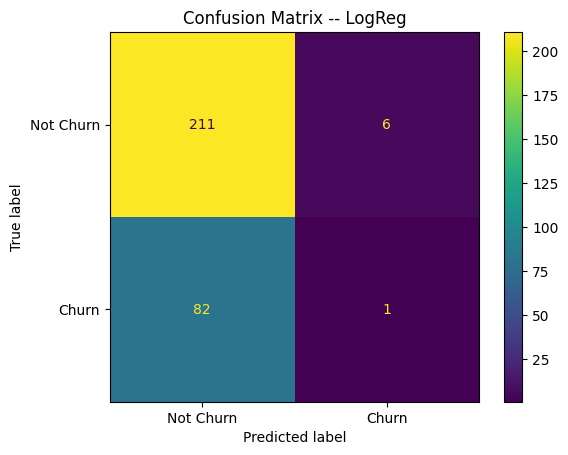

In [246]:
report_LR = classification_report(y_test, pred_LR)
print(report_LR)

# Confusion Matrix for LogReg
ConfusionMatrixDisplay.from_predictions(y_test, pred_LR, display_labels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix -- LogReg')
plt.show()